<a href="https://colab.research.google.com/github/gandharvbakshi/AI-and-ML-Hackathons/blob/main/AB_Urban_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Audio Processing Libraries
import librosa
from scipy import signal

#For Playing Audio
import IPython.display as ipd

#Array Processing
import numpy as np
import pandas as pd


import os

#Data Visualization 
import matplotlib.pyplot as plt

In [42]:
temppath = '/content/drive/MyDrive/AI ML Projects/AB Course/Urban Sounds/train/Train'
os.listdir(temppath)[:10]
#!unzip '/content/drive/MyDrive/AI ML Projects/AB Course/Urban Sounds/Copy of train.zip' -d "/content/drive/MyDrive/AI ML Projects/AB Course/Urban Sounds/train/"
#!unzip '/content/drive/MyDrive/AI ML Projects/AB Course/Urban Sounds/Copy of test.zip' -d "/content/drive/MyDrive/AI ML Projects/AB Course/Urban Sounds/test/"


['5023.wav',
 '4540.wav',
 '8617.wav',
 '2927.wav',
 '6376.wav',
 '639.wav',
 '6755.wav',
 '1945.wav',
 '8351.wav',
 '8234.wav']

In [4]:
#!unzip 'drive/My Drive/audio.zip'
dataDir = '/content/drive/MyDrive/AI ML Projects/AB Course/Urban Sounds/'
trainDataRaw = pd.read_csv(os.path.join(dataDir, 'train/train.csv'))
testDataRaw = pd.read_csv(os.path.join(dataDir, 'test/test.csv'))
trainImagePath = os.path.join(dataDir, 'train/Train')
testImagePath = os.path.join(dataDir, 'test/Test')
#path='/content/drive/MyDrive/AI ML Projects/AB Course/Sound classification/emergency.wav'


Compute the duration of a clip

In [34]:
trainDataRaw.head(5)

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [39]:
trial_index = 100
trial1,sample_rate1    = librosa.load(os.path.join(trainImagePath, os.listdir(trainImagePath)[trial_index]))

duration1 = librosa.get_duration(trial1)

print("Duration of clip in seconds, sample_rate, classification:",duration1, sample_rate1, trainDataRaw.loc[trial_index, 'Class'])

Duration of clip in seconds, sample_rate, classification: 4.0 22050 siren


In [23]:
ipd.Audio(trial1,rate=22050)

Text(0, 0.5, 'Amplitude')

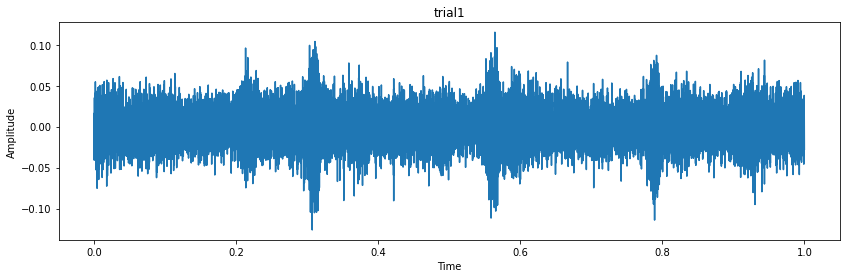

In [40]:
plt.figure(figsize=(14,4))
plt.plot(np.linspace(0, 1, num=len(trial1)),trial1)
plt.title('trial1')
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [6]:
trainDataRaw['Class'].nunique()

10

In [5]:
MAX_LEN = 89009
X_temp = []

for i in range(0 , 20):
  if (i % 1000 == 0):
    print(i, "th audio done")
  fileName = str(trainDataRaw.loc[i, 'ID']) + ".wav"
  audioData ,sample_rate    = librosa.load(os.path.join(trainImagePath,fileName ))
  #print(audioData, len(audioData), np.array(audioData, dtype = float).dtype)
  #X_temp.append(np.array(audioData, dtype = float))
  if (len(audioData) < MAX_LEN):   
  #  print(librosa.get_duration(audioData), sample_rate)
    padded_array = np.zeros(MAX_LEN - len(audioData))
    newData = np.append(audioData, padded_array)
    #print(newData.shape)
    X_temp.append(newData)
  else:
    X_temp.append(audioData)
  #  break'''
X_temp = np.array(X_temp)
X_temp.dtype
#ipd.Audio(X_temp[9],rate=22050)

0 th audio done


dtype('float64')

In [30]:
#for j in range(0, len(X_temp)):
  #X_temp[j] = np.append(X_temp[j], np.zeros(1))
print(X_temp.dtype, X_temp.shape)
#X_temp[10]
b = np.hstack((X_temp, np.zeros((X_temp.shape[0], 1), dtype=X_temp.dtype)))
b.shape
#np.zeros((X_temp.shape[1]), dtype=X_temp.dtype).reshape(1,-1).shape

float64 (20, 89009)


(20, 89010)

In [63]:
import numpy as np

A = [1.0, 2.0]
B = [3.0]
C = [5.0,6.0]
conc = []
conc.append(np.array(A))
conc.append(np.append(np.array(B), np.zeros(1)))
conc.append(np.array(C))
conc = np.array(conc)
print(conc.dtype)

for i in range(0, len(conc)):
  if len(conc[i]) < 2:
    conc[i] = np.append(conc[i], np.zeros(2 - len(conc[i]), dtype = float))
    print(conc[i].dtype)

print(conc, conc.dtype, conc.shape)
#conc = conc.astype(np.float64)

float64
[[1. 2.]
 [3. 0.]
 [5. 6.]] float64 (3, 2)


In [64]:
max_len = 0
for i in range(0 , len(trainDataRaw)):
  if (i % 1000 == 0):
    print(i, "th audio done")
  fileName = str(trainDataRaw.loc[i, 'ID']) + ".wav"
  audioData ,sample_rate    = librosa.load(os.path.join(trainImagePath,fileName ))
  if len(audioData) > max_len:
    max_len = len(audioData)
print(max_len)


0 th audio done
1000 th audio done
2000 th audio done
3000 th audio done
4000 th audio done
5000 th audio done
88375


In [65]:
for i in range(0 , len(testDataRaw)):
  if (i % 1000 == 0):
    print(i, "th audio done")
  fileName = str(testDataRaw.loc[i, 'ID']) + ".wav"
  audioData ,sample_rate    = librosa.load(os.path.join(testImagePath,fileName ))
  if len(audioData) > max_len:
    max_len = len(audioData)
print(max_len)


0 th audio done
1000 th audio done
2000 th audio done
3000 th audio done
89009


In [67]:
MAX_LEN = 89009
X = []
y = []
sr = []
i = 0
max_len = 0
for i in range(0 , len(trainDataRaw)):
  if (i % 1000 == 0):
    print(i, "th audio done")
  fileName = str(trainDataRaw.loc[i, 'ID']) + ".wav"
  audioData ,sample_rate    = librosa.load(os.path.join(trainImagePath,fileName ))
  if (len(audioData) < MAX_LEN):   
  #  print(librosa.get_duration(audioData), sample_rate)
    padded_array = np.zeros(MAX_LEN - len(audioData))
    newData = np.append(audioData, padded_array)
    #print(newData.shape)
    X.append(newData)
  else:
    X.append(audioData)
  y.append(trainDataRaw.loc[i, 'Class'])
  #sr.append(sample_rate)
X = np.array(X)
y = np.array(y)
#sr = np.array(sr)


0 th audio done
1000 th audio done
2000 th audio done
3000 th audio done
4000 th audio done
5000 th audio done


In [68]:
X_test = []
sr_test = []
i = 0

for i in range(0 , len(testDataRaw)):
  if (i % 1000 == 0):
    print(i, "th audio done")
  fileName = str(testDataRaw.loc[i, 'ID']) + ".wav"
  audioData ,sample_rate    = librosa.load(os.path.join(testImagePath,fileName ))
  #X_test.append(audioData)
  #sr_test.append(sample_rate)
  if (len(audioData) < MAX_LEN):   
  #  print(librosa.get_duration(audioData), sample_rate)
    padded_array = np.zeros(MAX_LEN - len(audioData))
    newData = np.append(audioData, padded_array)
    #print(newData.shape)
    X_test.append(newData)
  else:
    X_test.append(audioData)
  
X_test = np.array(X_test)
sr_test = np.array(sr_test)

0 th audio done
1000 th audio done
2000 th audio done
3000 th audio done


In [5]:
from numpy import save 

#save(os.path.join(dataDir,'X_train.npy'), X)
#save(os.path.join(dataDir,'Y_train.npy'), y)
#save(os.path.join(dataDir,'X_test.npy'), X_test)

X = np.load(os.path.join(dataDir,'X_train.npy'), allow_pickle=False)
y = np.load(os.path.join(dataDir,'Y_train.npy'), allow_pickle=False)
X_test = np.load(os.path.join(dataDir,'X_test.npy'), allow_pickle=False)


In [6]:
X = np.hstack((X, np.zeros((X.shape[0], 1), dtype=X.dtype)))
X_test = np.hstack((X_test, np.zeros((X_test.shape[0], 1), dtype=X.dtype)))
print(X.shape, X_test.shape)

(5435, 89010) (3297, 89010)


In [74]:
y.shape

(5435, 10)

In [8]:
y = pd.get_dummies(trainDataRaw['Class']).values

In [29]:
class_names = pd.get_dummies(trainDataRaw['Class']).columns.tolist()
def top_3_classes(classes, prob):
  max1 = 0
  max2 = 0
  max3 = 0
  max1_index = 0
  max2_index = 0
  max3_index = 0
  for i in range(0, len(prob)):
    if prob[i] > max1: 
      max1 = prob[i]
      max1_index = i
    elif prob[i] > max2: 
      max2 = prob[i]
      max2_index = i
    elif prob[i] > max3: 
      max3 = prob[i]
      max3_index = i
  top_3_classes = [[classes[max1_index], classes[max2_index],classes[max3_index]], [max1, max2, max3 ]]
  return top_3_classes

def top_1_classe(classes, prob):
  max1 = 0
  max1_index = 0
  for i in range(0, len(prob)):
    if prob[i] > max1: 
      max1 = prob[i]
      max1_index = i
  top_1_class = classes[max1_index]
  return top_1_class


In [9]:
max_len = 0
counter1 = 0
for i in range(0, len(X)):
  if (len(X[i]) > 88200):
    max_len = len(X[i])
    counter1 = counter1 + 1
print(max_len, counter1)

for i in range(0, len(X)):
  if (len(X[i]) < max_len):
    padded_array = np.zeros(max_len - len(X[i]))
    X[i] = np.append(X[i], padded_array)
X.shape  


88375 1


(5435,)

In [11]:
#print(len(X[0]))
#print(max_len)
print(X.shape, y.shape, X_test.shape)

(5435, 89010) (5435, 10) (3297, 89010)


**Split into train and validation set**

Next, we will train the model on 90% of the data and validate on the remaining 10%:

In [12]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(X),np.array(y), test_size = 0.2,random_state=777)
x_final = X_test

The input to the conv1d must be 3 dimensional array - (no. of samples, timesteps, features)

So, lets reshape our input array according to the required shape

In [70]:
print(x_final.dtype, x_final.shape)
#print(np.array([1, 3]).shape)
#trial_arr = np.array([ np.array([1, 3]), np.array([2,4]) ])
#trial_arr.shape
#x_tr_trial = x_tr[ : 100].copy()""

float64 (3297, 89010)


In [12]:
x_tr_features  = x_tr.reshape(len(x_tr),-1,1)
x_val_features = x_val.reshape(len(x_val),-1,1)
x_final_features = x_final.reshape(len(x_final),-1,1)
print("Reshaped Array Size",x_tr_features.shape)

Reshaped Array Size (4348, 89009, 1)


In [13]:
x_val_features.shape

(1087, 89009, 1)

**Model Architecture**

Lets define the model architecture using conv1D layers as it performs convolution only along one dimension

In [96]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend as K

def conv1d(x_tr):
  K.clear_session()
  inputs = Input(shape=(x_tr.shape[1],x_tr.shape[2]), name = "Conv1d_Input")

  #First Conv1D layer
  conv = Conv1D(8, 13, padding='same', activation='relu')(inputs)
  conv = Dropout(0.3)(conv)
  conv = MaxPooling1D(pool_size=2, strides=1, padding='valid')(conv)

  #Second Conv1D layer
  conv = Conv1D(16, 11, padding='same', activation='relu')(conv)
  conv = Dropout(0.3)(conv)
  conv = MaxPooling1D(pool_size=2, strides=1, padding='valid')(conv)

  #MaxPooling 1D
  conv = GlobalMaxPool1D()(conv)

  #Dense Layer 
  conv = Dense(16, activation='relu')(conv)
  outputs = Dense(10,activation='softmax')(conv)

  model = Model(inputs, outputs)
  
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
  model_checkpoint = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=3),
    ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose = 1, save_best_only = True, mode='max')
    ]

  return model,my_callbacks
  
#  return model, model_checkpoint
def conv1d_new(x_tr):
  K.clear_session()
  inputs = Input(shape=(x_tr.shape[1],x_tr.shape[2]))

  #First Conv1D layer
  conv = Conv1D(64, 13, padding='same', activation='relu')(inputs)
  conv = Dropout(0.3)(conv)
  conv = MaxPooling1D(pool_size=2, strides=1, padding='valid')(conv)

  #Second Conv1D layer
  conv = Conv1D(16, 11, padding='same', activation='relu')(conv)
  conv = Dropout(0.3)(conv)
  conv = MaxPooling1D(pool_size=2, strides=1, padding='valid')(conv)

  #MaxPooling 1D
  conv = GlobalMaxPool1D(name = "Conv1DGlobalPool")(conv)

  #Dense Layer 
  conv = Dense(16, activation='relu')(conv)
  outputs = Dense(10,activation='softmax')(conv)

  model = Model(inputs, outputs)
  
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
  model_checkpoint = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=3),
    ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose = 1, save_best_only = True, mode='max')
    ]

  return model,my_callbacks


Define the model:

In [97]:
model, model_checkpoint = conv1d(x_tr_features)

Understand the shape and parameters at each layer

In [98]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1d_Input (InputLayer)    [(None, 773, 116)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 773, 8)            12072     
_________________________________________________________________
dropout (Dropout)            (None, 773, 8)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 772, 8)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 772, 16)           1424      
_________________________________________________________________
dropout_1 (Dropout)          (None, 772, 16)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 771, 16)           0     

Lets train the model for 10 epochs with batch size of 32:

In [17]:
history=model.fit(x_tr_features, y_tr ,epochs=10, callbacks=[model_checkpoint],validation_data=(x_val_features,y_val))

Epoch 1/10
136/136 [==============================] - 194s 1s/step - loss: 2.2653 - acc: 0.1481 - val_loss: 2.2302 - val_acc: 0.1711

Epoch 00001: val_acc improved from -inf to 0.17111, saving model to best_model.hdf5
Epoch 2/10
136/136 [==============================] - 192s 1s/step - loss: 2.1608 - acc: 0.2291 - val_loss: 2.1153 - val_acc: 0.2401

Epoch 00002: val_acc improved from 0.17111 to 0.24011, saving model to best_model.hdf5
Epoch 3/10
136/136 [==============================] - 198s 1s/step - loss: 2.0370 - acc: 0.2916 - val_loss: 2.0215 - val_acc: 0.2944

Epoch 00003: val_acc improved from 0.24011 to 0.29439, saving model to best_model.hdf5
Epoch 4/10
136/136 [==============================] - 192s 1s/step - loss: 1.9514 - acc: 0.3264 - val_loss: 1.9515 - val_acc: 0.3266

Epoch 00004: val_acc improved from 0.29439 to 0.32659, saving model to best_model.hdf5
Epoch 5/10
136/136 [==============================] - 191s 1s/step - loss: 1.8906 - acc: 0.3526 - val_loss: 1.8945 - va

Load the best model

In [18]:
model.load_weights('best_model.hdf5')

Evaluate the model on hold out set

In [19]:
_, acc = model.evaluate(x_val_features,y_val)
print("Validation Accuracy:",acc)

34/34 [==============================] - 11s 320ms/step - loss: 1.7845 - acc: 0.3790
Validation Accuracy: 0.37902483344078064


**Inference**

Let us make predictions on the hold out set

In [49]:
ind=15
test_audio = x_val[ind]
ipd.Audio(test_audio,rate=16000)

In [50]:
feature = x_val_features[ind]
prob = model.predict(feature.reshape(1,-1,1))

def top_3_classes(classes, prob):
  max1 = 0
  max2 = 0
  max3 = 0
  max1_index = 0
  max2_index = 0
  max3_index = 0
  for i in range(0, len(prob)):
    if prob[i] > max1: 
      max1 = prob[i]
      max1_index = i
    elif prob[i] > max2: 
      max2 = prob[i]
      max2_index = i
    elif prob[i] > max3: 
      max3 = prob[i]
      max3_index = i
  top_3_classes = [[classes[max1_index], classes[max2_index],classes[max3_index]], [max1, max2, max3 ]]
  return top_3_classes

top_3_classes(class_names, prob[0])
#np.concatenate((np.array(class_names).reshape(1,-1),prob[0].reshape(1,-1)),axis=0)
#print("Prediction:",prob[0])

[['jackhammer', 'engine_idling', 'street_music'],
 [0.38917825, 0.09632493, 0.090273865]]

In [ ]:
#lstm 

In [53]:
x_tr_features.shape

(4348, 89009, 1)

In [72]:
x_tr_features  = x_tr.reshape(len(x_tr),-1,230)
x_val_features = x_val.reshape(len(x_val),-1,230)
x_final_features = x_final.reshape(len(x_final),-1,230)
print("Reshaped Array Size",x_tr_features.shape, x_final_features.shape)

Reshaped Array Size (4348, 387, 230) (3297, 387, 230)


In [93]:
def lstm(x_tr):
  K.clear_session()
  inputs = Input(shape=(x_tr.shape[1],x_tr.shape[2]), name = 'LSTM_input')

  #(Masking(mask_value=0., input_shape=(timesteps, features))
  inputs_masked = tf.keras.layers.Masking(mask_value=0., input_shape=(x_tr.shape[1],x_tr.shape[2]))(inputs)
  #lstm
  x = LSTM(128)(inputs_masked)
  #x = Dropout(0.3)(x)
  
  #dense
  x= Dense(64,activation='relu')(x)
  x= Dense(10,activation='softmax')(x)
  
  model = Model(inputs, x)
  
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
  model_checkpoint = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

  return model, model_checkpoint

In [94]:
model, mc = lstm(x_tr_features)

In [95]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_input (InputLayer)      [(None, 773, 116)]        0         
_________________________________________________________________
masking (Masking)            (None, 773, 116)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               125440    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 134,346
Trainable params: 134,346
Non-trainable params: 0
_________________________________________________________________


In [82]:
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [83]:
history=model.fit(x_tr_features, y_tr, epochs=10, callbacks=[mc], batch_size=32, validation_data=(x_val_features,y_val))

Epoch 1/10
136/136 [==============================] - 78s 542ms/step - loss: 2.2470 - acc: 0.1589 - val_loss: 2.1866 - val_acc: 0.1785

Epoch 00001: val_acc improved from -inf to 0.17847, saving model to best_model.hdf5
Epoch 2/10
136/136 [==============================] - 72s 526ms/step - loss: 2.1444 - acc: 0.1932 - val_loss: 2.1478 - val_acc: 0.2291

Epoch 00002: val_acc improved from 0.17847 to 0.22907, saving model to best_model.hdf5
Epoch 3/10
136/136 [==============================] - 72s 528ms/step - loss: 2.0733 - acc: 0.2263 - val_loss: 2.0661 - val_acc: 0.2374

Epoch 00003: val_acc improved from 0.22907 to 0.23735, saving model to best_model.hdf5
Epoch 4/10
136/136 [==============================] - 72s 530ms/step - loss: 2.0159 - acc: 0.2537 - val_loss: 2.0793 - val_acc: 0.2245

Epoch 00004: val_acc did not improve from 0.23735
Epoch 5/10
136/136 [==============================] - 72s 527ms/step - loss: 1.9290 - acc: 0.3008 - val_loss: 2.0153 - val_acc: 0.2466

Epoch 00005:

In [84]:
model.load_weights('best_model.hdf5')

In [85]:
_,acc = model.evaluate(x_val_features,y_val)
print("Accuracy:",acc)

34/34 [==============================] - 5s 144ms/step - loss: 1.9136 - acc: 0.3174
Accuracy: 0.31738731265068054


In [65]:
ind=15
test_audio = x_val[ind]
ipd.Audio(test_audio,rate=16000)

In [86]:
feature = x_val_features[ind]
prob = model.predict(feature.reshape(1,-1,feature.shape[1]))
def top_3_classes(classes, prob):
  max1 = 0
  max2 = 0
  max3 = 0
  max1_index = 0
  max2_index = 0
  max3_index = 0
  for i in range(0, len(prob)):
    if prob[i] > max1: 
      max1 = prob[i]
      max1_index = i
    elif prob[i] > max2: 
      max2 = prob[i]
      max2_index = i
    elif prob[i] > max3: 
      max3 = prob[i]
      max3_index = i
  top_3_classes = [[classes[max1_index], classes[max2_index],classes[max3_index]], [max1, max2, max3 ]]
  return top_3_classes

def top_1_classe(classes, prob):
  max1 = 0
  max1_index = 0
  for i in range(0, len(prob)):
    if prob[i] > max1: 
      max1 = prob[i]
      max1_index = i
  top_1_class = classes[max1_index]
  return top_1_class

top_3_classes(class_names, prob[0])


[['street_music', 'siren', 'drilling'], [0.2874145, 0.047841985, 0.011063225]]

In [87]:
final_prob = model.predict(x_final_features)

y_pred_final = []
for i in range(0,final_prob.shape[0]):
  y_pred_final.append(top_1_classe(class_names,final_prob[i] ))
y_pred_final = np.array(y_pred_final)
y_pred_final.shape

(3297,)

In [89]:
testDataSub = testDataRaw.copy()
testDataSub['Class'] = y_pred_final
testDataSub[['Class','ID' ]].to_csv(os.path.join(dataDir, 'submission2 LSTM without dropout.csv'), index = False)

## Spectrogram

Ever heard of a spectrogram? It’s a 2D plot between time and frequency where each point in the plot represents the amplitude of a particular frequency at a particular time in terms of intensity of color. In simple terms, the spectrogram is a spectrum (broad range of colors) of frequencies as it varies with time. 

Let us define a function that computes the spectrogram. Before that, we need to understand how the spectrogram is computed.

Spectrogram accepts the raw audio wave and then breaks it into chunks or windows and then applies FFT on each window to compute the frequencies.

Coming to the parameters for computing spectrogram: 

* nperseg = Size of the window i.e. no. of samples in each chunk
* noverlap= No. of overlapping samples between each window

In [14]:
def log_specgram(audio, sample_rate, eps=1e-10):
    nperseg  = 230
    noverlap = 115
    freqs, times, spec = signal.spectrogram(audio,fs=sample_rate, nperseg=nperseg,noverlap=noverlap,detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Define a function for representing spectrogram:

In [15]:
def plot(spectrogram,label):
  fig = plt.figure(figsize=(14, 8))
  ax = fig.add_subplot(211)
  ax.imshow(spectrogram.T, aspect='auto', origin='lower',extent=[times.min(), times.max(), freqs.min(), freqs.max()])
  ax.set_title('Spectrogram of '+label)
  ax.set_ylabel('Freqs in Hz')
  ax.set_xlabel('Seconds')

Compute the spectrogram:

(773, 116)


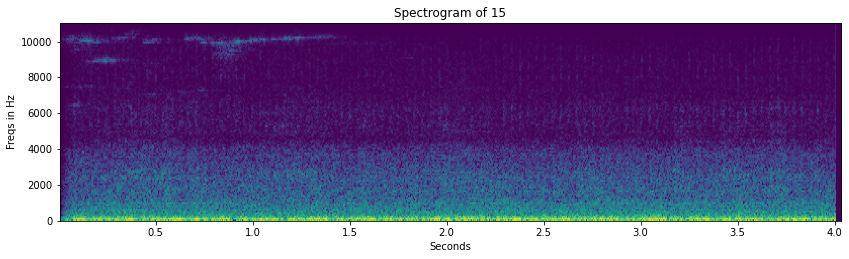

In [99]:
ind=1000
test_audio = x_val[ind]
sample_rate = 22050

freqs, times, spectrogram = log_specgram(test_audio, sample_rate)
print(spectrogram.shape)
plot(spectrogram,"15")


Understand the shape of the spectrogram:

array([-15.575486 , -12.7084675, -10.321972 , -10.88457  , -13.834395 ,
       -11.873345 , -12.735329 , -10.884907 , -11.905026 , -12.934278 ,
       -11.877053 , -12.938899 , -10.983666 , -13.229616 , -12.708224 ,
       -13.509246 , -13.072082 , -12.255045 , -11.2173   , -12.414617 ,
       -14.078011 , -13.788856 , -13.033925 , -14.271732 , -13.406035 ,
       -14.840687 , -13.030424 , -13.702069 , -12.194617 , -11.808323 ,
       -13.498567 , -14.070996 , -13.045364 , -12.865691 , -15.32106  ,
       -14.645406 , -13.01926  , -11.747046 , -15.439046 , -12.791425 ,
       -12.659919 , -15.946685 , -12.676854 , -14.271466 , -14.438596 ,
       -13.373798 , -15.43779  , -14.18673  , -15.91461  , -17.066963 ,
       -14.880674 , -17.846455 , -13.438975 , -14.584175 , -15.099297 ,
       -15.432151 , -17.176888 , -14.46726  , -14.187905 , -16.284077 ,
       -17.996298 , -19.971926 , -15.289653 , -15.974499 , -15.171322 ,
       -16.025553 , -16.350607 , -16.872051 , -14.942889 , -17.5

Extract the spectrogram features

In [16]:
def extract_spectrogram_features(x_tr):
  features=[]
  for i in x_tr:
    _, _, spectrogram = log_specgram(i, sample_rate)
    
    mean = np.mean(spectrogram, axis=0)
    std = np.std(spectrogram, axis=0)
    spectrogram = (spectrogram - mean) / std
    
    features.append(spectrogram)

  return np.array(features)

In [18]:
sample_rate = 22050

x_tr_features  = extract_spectrogram_features(x_tr)
x_val_features = extract_spectrogram_features(x_val)
x_final_features = extract_spectrogram_features(x_final)

**Define architecture**

Now, we will define the LSTM architecture for solving the task

In [85]:
def lstm(x_tr):
  K.clear_session()
  inputs = Input(shape=(x_tr.shape[1],x_tr.shape[2]))
  
  inputs_masked = tf.keras.layers.Masking(mask_value=0.)(inputs)
  #lstm
  x = LSTM(128)(inputs_masked)
  x = Dropout(0.3)(x)
  
  #dense
  x= Dense(100,activation='relu', name = 'LSTMDense')(x)
  x = Dropout(0.3)(x)
  x= Dense(50,activation='relu')(x)
  x= Dense(10,activation='softmax')(x)
  
  model = Model(inputs, x)
  
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
  model_checkpoint = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=3),
    ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose = 1, save_best_only = True, mode='max')
    ]

  return model,my_callbacks
    
  #return model,model_checkpoint

Define the model:

In [86]:
model, my_callbacks = lstm(x_tr_features)

Understand the no. of parameters and shape of each layer:

In [87]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 773, 116)]        0         
_________________________________________________________________
masking (Masking)            (None, 773, 116)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               125440    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
LSTMDense (Dense)            (None, 100)               12900     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050  

Train the model

In [58]:
history=model.fit(x_tr_features, y_tr, epochs=50, callbacks=my_callbacks,  validation_data=(x_val_features,y_val))#batch_size=32,

Epoch 1/50
136/136 [==============================] - 126s 930ms/step - loss: 1.2482 - acc: 0.5448 - val_loss: 1.2299 - val_acc: 0.5529

Epoch 00001: val_acc improved from 0.53174 to 0.55290, saving model to best_model.hdf5
Epoch 2/50
136/136 [==============================] - 123s 907ms/step - loss: 1.1399 - acc: 0.5844 - val_loss: 1.2155 - val_acc: 0.5474

Epoch 00002: val_acc did not improve from 0.55290
Epoch 3/50
136/136 [==============================] - 126s 924ms/step - loss: 1.1375 - acc: 0.5908 - val_loss: 1.1867 - val_acc: 0.5833

Epoch 00003: val_acc improved from 0.55290 to 0.58326, saving model to best_model.hdf5
Epoch 4/50
136/136 [==============================] - 124s 912ms/step - loss: 1.1413 - acc: 0.5780 - val_loss: 1.2183 - val_acc: 0.5759

Epoch 00004: val_acc did not improve from 0.58326
Epoch 5/50
136/136 [==============================] - 124s 914ms/step - loss: 1.0901 - acc: 0.6044 - val_loss: 1.1837 - val_acc: 0.5989

Epoch 00005: val_acc improved from 0.5832

Load the weights of the best model:

In [59]:
model.load_weights('best_model.hdf5')

Evaluating the performance of the model on validation set:

In [60]:
_,acc = model.evaluate(x_val_features,y_val)
print("Accuracy:",acc)

34/34 [==============================] - 9s 274ms/step - loss: 1.1153 - acc: 0.6182
Accuracy: 0.6182152628898621


**Inference**

Let us make predictions on the validation data

In [108]:
ind=1
test_audio = x_val[ind]
ipd.Audio(test_audio,rate=16000)

In [109]:
feature = x_val_features[ind]
prob = model.predict(feature.reshape(1,-1,feature.shape[1]))

top_3_classes(class_names, prob[0])


[['street_music', 'drilling', 'jackhammer'],
 [0.48309743, 0.09716944, 0.09633819]]

In [30]:

final_prob = model.predict(x_final_features)

y_pred_final = []
for i in range(0,final_prob.shape[0]):
  y_pred_final.append(top_1_classe(class_names,final_prob[i] ))
y_pred_final = np.array(y_pred_final)
y_pred_final.shape
testDataSub = testDataRaw.copy()
testDataSub['Class'] = y_pred_final
testDataSub[['Class','ID' ]].to_csv(os.path.join(dataDir, 'submission5 Spectogram LSTM with Masking.csv'), index = False)

Lets train conv1d on the same spectrogram features. So, lets define the conv1d model


In [83]:
model, my_callbacks = conv1d_new(x_tr_features)

Understand the input and output shape of each layer:

In [84]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 773, 116)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 773, 64)           96576     
_________________________________________________________________
dropout (Dropout)            (None, 773, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 772, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 772, 16)           11280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 772, 16)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 771, 16)           0     

Training the model:

In [78]:
history=model.fit(x_tr_features, y_tr, epochs=50, callbacks=my_callbacks, validation_data=(x_val_features,y_val)) #batch_size=32,

Epoch 1/50
136/136 [==============================] - 36s 258ms/step - loss: 2.5901 - acc: 0.2173 - val_loss: 1.9912 - val_acc: 0.2852

Epoch 00001: val_acc improved from -inf to 0.28519, saving model to best_model.hdf5
Epoch 2/50
136/136 [==============================] - 35s 258ms/step - loss: 1.8824 - acc: 0.3530 - val_loss: 1.7920 - val_acc: 0.3910

Epoch 00002: val_acc improved from 0.28519 to 0.39098, saving model to best_model.hdf5
Epoch 3/50
136/136 [==============================] - 35s 259ms/step - loss: 1.6318 - acc: 0.4393 - val_loss: 1.5797 - val_acc: 0.4600

Epoch 00003: val_acc improved from 0.39098 to 0.45998, saving model to best_model.hdf5
Epoch 4/50
136/136 [==============================] - 36s 268ms/step - loss: 1.4482 - acc: 0.5060 - val_loss: 1.5144 - val_acc: 0.5069

Epoch 00004: val_acc improved from 0.45998 to 0.50690, saving model to best_model.hdf5
Epoch 5/50
136/136 [==============================] - 36s 263ms/step - loss: 1.3298 - acc: 0.5407 - val_loss: 1

Load the best saved model

In [79]:
model.load_weights('best_model.hdf5')

Evaluating the performance of the model:

In [80]:
_,acc = model.evaluate(x_val_features,y_val)
print("Accuracy:",acc)

34/34 [==============================] - 2s 62ms/step - loss: 1.0790 - acc: 0.6642
Accuracy: 0.6642134189605713


**Inference**:

Let us make predictions on the validation data


In [ ]:
ind=1
test_audio = x_val[ind]
ipd.Audio(test_audio,rate=16000)

In [ ]:
feature = x_val_features[ind]
prob = model.predict(feature.reshape(1,-1,feature.shape[1]))

top_3_classes(class_names, prob[0])


Predicion: emergency


In [81]:
final_prob = model.predict(x_final_features)

y_pred_final = []
for i in range(0,final_prob.shape[0]):
  y_pred_final.append(top_1_classe(class_names,final_prob[i] ))
y_pred_final = np.array(y_pred_final)
y_pred_final.shape
testDataSub = testDataRaw.copy()
testDataSub['Class'] = y_pred_final
testDataSub[['Class','ID' ]].to_csv(os.path.join(dataDir, 'submission8 Spectogram Conv1D more filters no batches with pooling dropout.csv'), index = False)

In [116]:
from functools import partial
from tensorflow import keras


def combined_model_new(x_tr):
  K.clear_session()
  inputs = Input(shape=(x_tr.shape[1],x_tr.shape[2]))

  inputs_masked = tf.keras.layers.Masking(mask_value=0.)(inputs)
  #lstm
  x = LSTM(128)(inputs_masked)
  x = Dropout(0.3)(x)

  #dense
#  x= Dense(50,activation='relu', name = 'LSTMDense')(x)
#  x = Dropout(0.3)(x)
  x= Dense(20,activation='relu')(x)

  #First Conv1D layer
  conv = Conv1D(64, 13, padding='same', activation='relu')(inputs)
  conv = Dropout(0.3)(conv)
  conv = MaxPooling1D(pool_size=2, strides=1, padding='valid')(conv)

  #Second Conv1D layer
  conv = Conv1D(16, 11, padding='same', activation='relu')(conv)
  conv = Dropout(0.3)(conv)
  conv = MaxPooling1D(pool_size=2, strides=1, padding='valid')(conv)

  #MaxPooling 1D
  conv = GlobalMaxPool1D(name = "Conv1DGlobalPool")(conv)

  combinedInput = concatenate([x,conv])
  
  #Dense Layer 

  hidden1 = Dense(100, activation='relu')(combinedInput)
  #hidden2 = Dense(10, activation='relu')(hidden1)
  outputs = Dense(10,activation='softmax')(hidden1)

  model = Model(inputs, outputs)
  
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
  model_checkpoint = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=3),
    ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose = 1, save_best_only = True, mode='max')
    ]

  return model,my_callbacks


def combined_model_old(x_tr):
  K.clear_session()
  #inputs = Input(shape=(x_tr.shape[1],x_tr.shape[2]))
  
  model1, _ = lstm(x_tr) #LSTMDense
  model2,_ = conv1d_new(x_tr) #Conv1DGlobalPool  
  combinedInput = concatenate([model1.get_layer("lstm").output, model2.get_layer("Conv1DGlobalPool").output])
  
  #dense
  x= Dense(100,activation='relu')(combinedInput)
  x = Dropout(0.3)(x)
  x= Dense(50,activation='relu')(x)
  x= Dense(10,activation='softmax')(x)
  
  #model = Model(inputs, x)
  model = Model(inputs=[model1.input, model2.input], outputs=x)
  
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
  model_checkpoint = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=3),
    ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose = 1, save_best_only = True, mode='max')
    ]

  return model,my_callbacks
    


In [117]:
model, my_callbacks = combined_model_new(x_tr_features)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 773, 116)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 773, 64)      96576       input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 773, 64)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 772, 64)      0           dropout_1[0][0]                  
______________________________________________________________________________________________

In [118]:
history=model.fit(x_tr_features, y_tr, epochs=50, callbacks=my_callbacks, validation_data=(x_val_features,y_val))#batch_size=32, 

Epoch 1/50
136/136 [==============================] - 172s 1s/step - loss: 1.8967 - acc: 0.3588 - val_loss: 1.5090 - val_acc: 0.4848

Epoch 00001: val_acc improved from -inf to 0.48482, saving model to best_model.hdf5
Epoch 2/50
136/136 [==============================] - 154s 1s/step - loss: 1.3904 - acc: 0.5172 - val_loss: 1.3918 - val_acc: 0.5538

Epoch 00002: val_acc improved from 0.48482 to 0.55382, saving model to best_model.hdf5
Epoch 3/50
136/136 [==============================] - 149s 1s/step - loss: 1.1475 - acc: 0.6051 - val_loss: 1.2391 - val_acc: 0.5704

Epoch 00003: val_acc improved from 0.55382 to 0.57038, saving model to best_model.hdf5
Epoch 4/50
136/136 [==============================] - 142s 1s/step - loss: 1.0175 - acc: 0.6357 - val_loss: 1.1106 - val_acc: 0.6182

Epoch 00004: val_acc improved from 0.57038 to 0.61822, saving model to best_model.hdf5
Epoch 5/50
136/136 [==============================] - 144s 1s/step - loss: 0.9034 - acc: 0.6962 - val_loss: 1.1029 - va

In [119]:
model.load_weights('best_model.hdf5')
_,acc = model.evaluate(x_val_features,y_val)
print("Accuracy:",acc)

34/34 [==============================] - 10s 306ms/step - loss: 0.9944 - acc: 0.6808
Accuracy: 0.6807727813720703


In [120]:
final_prob = model.predict(x_final_features)

y_pred_final = []
for i in range(0,final_prob.shape[0]):
  y_pred_final.append(top_1_classe(class_names,final_prob[i] ))
y_pred_final = np.array(y_pred_final)
y_pred_final.shape
testDataSub = testDataRaw.copy()
testDataSub['Class'] = y_pred_final
testDataSub[['Class','ID' ]].to_csv(os.path.join(dataDir, 'submission10 Spectogram LSTM+Conv1D Parallel-3 Functional.csv'), index = False)